근데 이 책도 예제 있지 않을까

# Tree
설명변수에 대해 표준화 할 필요없다= x축 스케일 조정할 필요가 없다

# Decision Tree
class_weight=None, criterion='gini', max_depth=4, max_features=None, max_leaf_nodes=None,
min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, presort=False, random_state=0, splitter='best'

In [5]:
from sklearn.model_selection import train_test_split

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
X= cancer['data']
y= cancer['target']
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 30)

In [7]:
tree= DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [9]:
print("훈련%9.5f"%tree.score(X_train,y_train))
print("새거%9.5f"%tree.score(X_test,y_test))

훈련  0.98826
새거  0.93007


#### 결정 트리 시각화

In [34]:
#pip install graphviz
import graphviz
from sklearn.tree import export_graphviz

In [20]:
export_graphviz(tree, out_file= 'data/tree.dot', class_names=['악성','양성'],
                feature_names= cancer.feature_names,
                impurity= False, filled= True)    

In [36]:
# #보류
# # failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH
# # graphviz를 수동 다운로드해서 path잡으라던데
# with open('data/tree.dot', 'r', encoding='utf-8') as f:
#     dot_graph= f.read()
# display(graphviz.Source(dot_graph))

# Random Forest
bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None,
min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1, oob_score=False, random_state=2, verbose=0, warm_start=False

https://codeshare.io/2KPpzY

p115

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
from sklearn.datasets import make_moons

In [48]:
X,y= make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify= y, random_state=42)

In [49]:
print(X_train.shape, y_train.shape)

(75, 2) (75,)


In [50]:
y_train[:3]

array([1, 1, 0], dtype=int64)

In [53]:
forest= RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

#### 별 의미는 없지만 그냥 한 번 보는 시각화
- 경계선: 분류기준
- plot 하나가 estimator(그러니까 나무) 1개

In [56]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

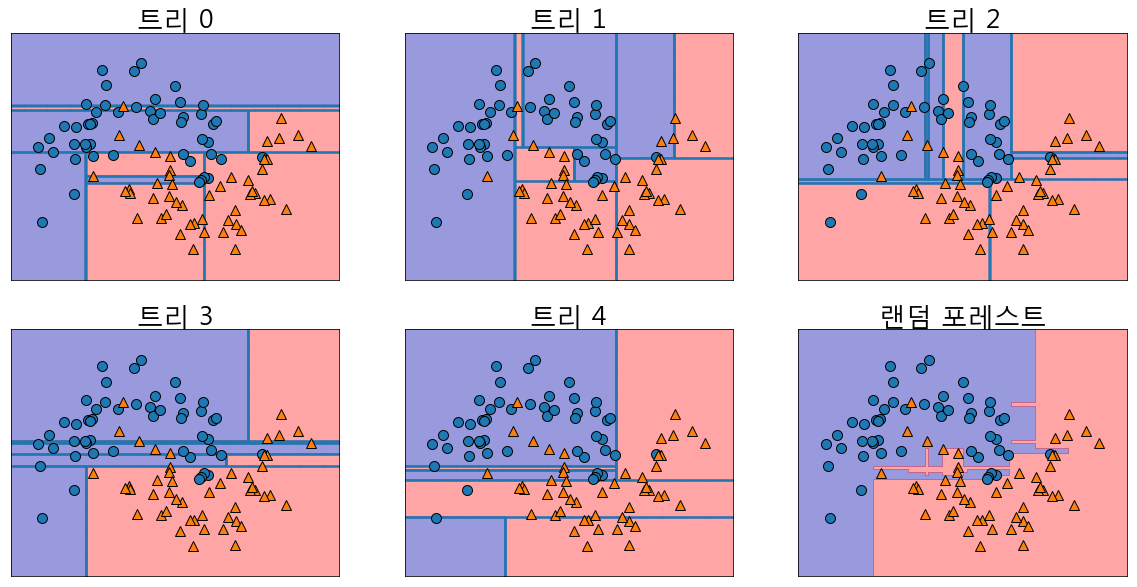

In [72]:
fig, axis= plt.subplots(2,3,figsize=(20,10))

# plt.rc('font',family='Malgun Gothic')
font = {'family' : 'Malgun Gothic'
        #,'weight' : 'bold'
        ,'size'   : 22}
plt.rc('font', **font)

#i,ax,tree -> not enough values to unpack (expected 3, got 2)
for i,(ax,tree) in enumerate(zip(axis.ravel(), forest.estimators_)):
    ax.set_title('트리 %d'%i)
    mglearn.plots.plot_tree_partition(X,y,tree, ax=ax)
    
# plot 마지막에 하나더
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axis[-1,-1], alpha=.4)
axis[-1,-1].set_title('랜덤 포레스트')
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [70]:
print(X[:,0].shape, X[:,1][:3])

(100,) [ 0.56839425 -0.34894509  0.10921819]


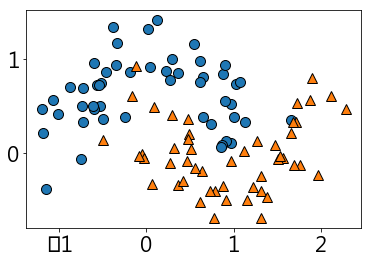

In [71]:
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axis[-1,-1], alpha=.4)
axis[-1,-1].set_title('랜덤 포레스트')
mglearn.discrete_scatter(X[:,0], X[:,1], y)

### 다시 좀 의미 있는 분석

In [73]:
X= cancer.data
y= cancer.target
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

In [74]:
forest= RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

###### RandomForestClassifier?
default- max_features='auto' or 'sqrt'> max_features=sqrt(n_features)
- 'log2' > log2(n_...)
- 'None'> n_...

#### 모델이 얼마나 잘 예측하나 확인하려고 맨끝 딱 1개만 빼놓음

In [77]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(426, 30) (426,) (143, 30) (143,)


In [98]:
print(X_train.shape, y_train.shape, X_test[[-1]].shape, y_test[[-1]].shape)

(426, 30) (426,) (1, 30) (1,)


In [94]:
print(X_train.shape, y_train.shape, X_test[:-1,:].shape, y_test[:-1].shape)

(426, 30) (426,) (142, 30) (142,)


In [101]:
X_test_sample= X_test[[-1]]
y_test_sample= y_test[[-1]]

In [102]:
print(X_test_sample.shape, y_test_sample.shape)

(1, 30) (1,)


In [103]:
X_test= X_test[:-1,:]
y_test= y_test[:-1]

In [105]:
print(X_test.shape, y_test.shape)

(142, 30) (142,)


#### 정확도 확인

In [106]:
print('훈련%15.5f'%forest.score(X_train,y_train))
print('새거 1개빼고%15.5f'%forest.score(X_test,y_test))

훈련        1.00000
새거 1개빼고        0.97183


### 랜덤 포레스트:parameter 튜닝
- max_features='auto',n_estimators=5,
- bootstrap=True, class_weight=None, criterion='gini', max_depth=None,  max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_jobs=1, oob_score=False, random_state=2, verbose=0, warm_start=False

#### try
1. n_estimators= 10000 해도 (1.0, 0.97183) 뜨더라
    - 일단 100으로 두고 다른 것부터
    - 너무 커지면 과적합

In [111]:
forest= RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [112]:
print('훈련%15.5f'%forest.score(X_train,y_train))
print('새거 1개빼고%15.5f'%forest.score(X_test,y_test))

훈련        1.00000
새거 1개빼고        0.97183


##### max_features 범위 뭘로 할지 대략보자
9쯤 가도 test score가 점점 커지더라

In [134]:
# n=10
# forest= RandomForestClassifier(n_estimators= n, random_state=0, max_features= max_feat)\
#                             .fit(X_train, y_train).score(X_test, y_test)

In [155]:
# featRange= np.linspace(1,9,20)
# featRange

array([1.        , 1.42105263, 1.84210526, 2.26315789, 2.68421053,
       3.10526316, 3.52631579, 3.94736842, 4.36842105, 4.78947368,
       5.21052632, 5.63157895, 6.05263158, 6.47368421, 6.89473684,
       7.31578947, 7.73684211, 8.15789474, 8.57894737, 9.        ])

RandomForestClassifier?
n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None

In [1]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
# import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
X= cancer.data
y= cancer.target

In [4]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

X_test_sample= X_test[[-1]]
y_test_sample= y_test[[-1]]

X_test= X_test[:-1,:]
y_test= y_test[:-1]

In [5]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(426, 30) (426,) (142, 30) (142,)


In [67]:
def randomForestParamMF(X,y,n=100):
    """
    X: data, y: target
    n: n_estimators
    """
    X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)
    scoreMax= 0
    max_featProp= 0
    scoreTrainMax= 0
    featRange= range(1,20,1)
    

    for max_feat in featRange:
        forest= RandomForestClassifier(n_estimators= n, random_state=0, max_features= max_feat)
        forest.fit(X_train, y_train)
        forestScore= forest.score(X_test, y_test)
        
        if forestScore> scoreMax:
            scoreMax= forestScore
            max_featProp= max_feat
            scoreTrainMax= forest.score(X_train,y_train)
        
    print('훈련%12.5f'%scoreTrainMax)
    print('새거Max%12.8f, max_featProp%9.5f'%(scoreMax, max_featProp))
    
    return max_featProp

In [68]:
max_featProp_= randomForestParamMF(X,y,100)

훈련     1.00000
새거Max  0.97902098, max_featProp  9.00000


In [65]:
max_featProp_

9

훈련        1.00000
새거Max  0.97902, max_featMax  9.00000


이상하다
.같은 param 넣고 왜 위보다 test score가 덜 나오지??
- 데이터를 다른 거 넣어서 ㅇㅇ

In [61]:
# X= cancer.data
# y= cancer.target
# X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)
# max_featProp= 9
# n_esti= 100
# forest= RandomForestClassifier(n_estimators= n_esti, random_state=0
#                                        , max_features= max_featProp)
# forest.fit(X_train, y_train)
# forest.score(X_test, y_test)

In [52]:
# [i for i in range(100,1000+1,100)]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [75]:
# max_feat_= max_featProp

X= cancer.data
y= cancer.target

def randomForestParamNEsti(X,y,max_feat_= max_featProp, n_estiMax= 1000):
    scoreMax= 0
    scoreTrainMax= 0
    n_estiProp= 100
    
    n_estiRange= range(0,n_estiMax+1,50)
    
    for n_esti in n_estiRange:
        n_esti= 1 if 0==n_esti else n_esti
        forest= RandomForestClassifier(n_estimators= n_esti, random_state=0
                                       , max_features= max_featProp)
        forest.fit(X_train, y_train)
        forestScore= forest.score(X_test, y_test)
        
        if forestScore> scoreMax:
            scoreMax= forestScore
            scoreTrainMax= forest.score(X_train,y_train)
            n_estiProp= n_esti
            
    print('훈련%15.5f'%scoreTrainMax)
    print('새거Max%9.5f, n_estiProp%9.5f'%(scoreMax, n_estiProp))

In [76]:
randomForestParamNEsti(X,y,max_feat_= max_featProp)

훈련        1.00000
새거Max  0.97902, n_estiProp100.00000


### n_estimators 는 클수록 좋다더니,
## 꼭 그런건 아닌가보다

In [77]:
n=1000
forest= RandomForestClassifier(n_estimators= n, random_state=0, max_features= 9)
forest.fit(X_train, y_train)
forestScore= forest.score(X_test, y_test)

In [78]:
print('훈련%15.5f'%forest.score(X_train,y_train))
print('새거 1개빼고%15.5f'%forest.score(X_test,y_test))

훈련        1.00000
새거 1개빼고        0.97203


### parameter 시각화

In [1]:
#[랜덤 포레스트 분석 예측 수행]
x_sample = X_test[-1]
X_test = X_test[:-1]
y_sample = y_test[-1]
y_test = y_test[:-1]

forest.predict(x_sample.reshape(1,-1))

forest.predict(x_sample.reshape(1,-1))[0]

y_hat = forest.predict(x_sample.reshape(1,-1))[0]

cancer['target_names'][y_hat]

cancer['target_names'][y_sample]


#[ 랜덤 포레스트 분석 시각화 ]
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=3)

    training_accuracy, test_accuracy = [],[]
    feature_setting = range(1,20)
    for max_feature in feature_setting  :
    forest = RandomForestClassifier(max_features=max_feature).fit(X_train, y_train)
    training_accuracy.append(forest.score(X_train, y_train))
    test_accuracy.append(forest.score(X_test, y_test))

    plt.plot(feature_setting, training_accuracy, label="훈련 정확도")
    plt.plot(feature_setting, test_accuracy, label="테스트 정확도")
    plt.ylabel("정확도")
    plt.xlabel("max_feature")
    plt.legend()

IndentationError: unexpected indent (<ipython-input-1-4f05fa69be4b>, line 22)

## 예제:독버섯
랜포

In [ ]:
import urllib.request as req
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
local= "mushroom.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, local)
print("ok")

ok


In [6]:
# 데이터 loading
mr = pd.read_csv("mushroom.csv", header=None)

In [8]:
print(mr.shape)
mr.head()

(8124, 23)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [62]:
type(mr)

pandas.core.frame.DataFrame

In [18]:
# mr.unstack()# 0 p, 1 e, 2 e, ...

In [23]:
# for row_index, row in mr.iterrows():
#     #print(row_index, row)# 0 0p 1x 2s, ... 1 0e 1x 2s, ...
#     #print(row.iloc[0]) #p e e p ... e e p e (첫 열)
#     #print(row.iloc[1:]) #1x 2s 3n, ..., 1x 2s 3y, ... (행순서로 나열, 단 둘째열  print(row.iloc[1:]) #1x 2s 3n, ..., 1x 2s 3y, ... (행순서로 나열, 단 둘째열 부터)

In [74]:
# 한 줄이면 되는데, 왜..?  ## mr.iloc[:,1:].applymap(ord)

# 데이터 내부의 기호를 숫자로 변환하기
target = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    target.append(row.iloc[0])
    row_data = []
    for v in row.iloc[1:]:
        row_data.append(ord(v))
    data.append(row_data)

In [75]:
data

[[120,
  115,
  110,
  116,
  112,
  102,
  99,
  110,
  107,
  101,
  101,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  107,
  115,
  117],
 [120,
  115,
  121,
  116,
  97,
  102,
  99,
  98,
  107,
  101,
  99,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  110,
  110,
  103],
 [98,
  115,
  119,
  116,
  108,
  102,
  99,
  98,
  110,
  101,
  99,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  110,
  110,
  109],
 [120,
  121,
  119,
  116,
  112,
  102,
  99,
  110,
  110,
  101,
  101,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  107,
  115,
  117],
 [120,
  115,
  103,
  102,
  110,
  102,
  119,
  98,
  107,
  116,
  101,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  101,
  110,
  97,
  103],
 [120,
  121,
  121,
  116,
  97,
  102,
  99,
  98,
  110,
  101,
  99,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  107,
  110,
  103],
 [98,
  115,
  119,
  116,
  97,
  102,
  99,
  98,
  103,
  101,
  99,
  115,
  115,


In [97]:
mrOrd= mr.iloc[:,1:].applymap(ord)
# print(mrOrd.shape)
# mrOrd

# print(ord('p'))
# print(ord('e'))

# print(chr(120))

# [i for i in mrOrd.iloc[1:len(mrOrd),:]]

(8124, 22)
112
101
x


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [52]:
from pandas import DataFrame

In [54]:
print(len(data), len(data[0]))
DataFrame(data)

8124 22


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,120,115,110,116,112,102,99,110,107,101,...,115,119,119,112,119,111,112,107,115,117
1,120,115,121,116,97,102,99,98,107,101,...,115,119,119,112,119,111,112,110,110,103
2,98,115,119,116,108,102,99,98,110,101,...,115,119,119,112,119,111,112,110,110,109
3,120,121,119,116,112,102,99,110,110,101,...,115,119,119,112,119,111,112,107,115,117
4,120,115,103,102,110,102,119,98,107,116,...,115,119,119,112,119,111,101,110,97,103
5,120,121,121,116,97,102,99,98,110,101,...,115,119,119,112,119,111,112,107,110,103
6,98,115,119,116,97,102,99,98,103,101,...,115,119,119,112,119,111,112,107,110,109
7,98,121,119,116,108,102,99,98,110,101,...,115,119,119,112,119,111,112,110,115,109
8,120,121,119,116,112,102,99,110,112,101,...,115,119,119,112,119,111,112,107,118,103
9,98,115,121,116,97,102,99,98,103,101,...,115,119,119,112,119,111,112,107,115,109


In [59]:
print('row_data_len:',len(row_data))
print('row_data: ',row_data)
print('target:',len(target))
target[:5] #열

row_data_len: 22
row_data:  [120, 115, 110, 102, 110, 97, 99, 98, 121, 101, 63, 115, 115, 111, 111, 112, 111, 111, 112, 111, 99, 108]
target: 8124


['p', 'e', 'e', 'p', 'e']

In [78]:
# data split
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [95]:
print(len(X_train), len(X_train[0]))
print(len(X_test), len(X_test[0]))
print(len(y_train), len(y_train[0]))
print(len(y_test), len(y_test[0]))

6093 22
2031 22
6093 1
2031 1


#### list 답답함;; 그냥 DataFrame으로 할래

In [114]:
data= mr.iloc[:,1:].applymap(ord)
data.shape

(8124, 22)

In [115]:
target= mr.iloc[:,0]
target.shape

(8124,)

In [153]:
X_train, X_test, y_train, y_test= train_test_split(data, target)

In [154]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6093, 22)
(2031, 22)
(6093,)
(2031,)


##### sample 하나만 빼둠

In [155]:
y_sample= y_test.iloc[-1]
y_test= y_test.iloc[:-1]

In [156]:
X_sample= X_test.iloc[-1]
X_test= X_test.iloc[:-1]

In [162]:
x_sample = X_test[-1]
X_test = X_test[:-1]
y_sample = y_test[-1]
y_test = y_test[:-1]

1.0

### X_sample 형태 맞춰주는데 좀 오래걸림

In [180]:
print(X_sample.reshape(-1,1).T.shape)
X_sample= X_sample.reshape(-1,1).T

(1, 22)


C:\Users\kitcoop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Users\kitcoop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [181]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_sample.shape)
print(y_sample)

(6093, 22)
(2030, 22)
(6093,)
(2030,)
(1, 22)
p


In [182]:
forest= RandomForestClassifier(n_estimators=3, random_state=33)

In [183]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=33, verbose=0, warm_start=False)

##### 이상하지만, test score 1이 원래 그런거랜다

In [184]:
forest.score(X_test, y_test)

1.0

#### y_sample 나오는걸 예측해야되서, X하나만 넣음

In [185]:
X_sample.reshape(-1,1).shape

(22, 1)

In [186]:
forest.predict(X_sample)

array(['p'], dtype=object)

In [187]:
forest.predict(X_sample)==y_sample

array([ True])